In [1]:
#Load libraries

import os
import pandas as pd
import numpy as np

In [2]:
os.chdir("C:/Users/PrasadaRao/Desktop/Credit_card_segmentation")

In [3]:
print (os.getcwd())

C:\Users\PrasadaRao\Desktop\Credit_card_segmentation


In [4]:
train_data = pd.read_csv("credit-card-data.csv")

In [5]:
train_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
print(train_data.shape)

(8950, 18)


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [8]:
train_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Handling missing values

In [11]:
train_data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [10]:
train_data['CREDIT_LIMIT'].fillna(train_data['CREDIT_LIMIT'].median(),inplace=True)
train_data['MINIMUM_PAYMENTS'].fillna(train_data['MINIMUM_PAYMENTS'].median(),inplace=True)
#print train_data.isnull().sum()

## Deriving KPI's

In [12]:
#Monthly average purchase
train_data['Monthly_avg_purchase']=train_data['PURCHASES']/train_data['TENURE']

#Cash Advance
train_data['Monthly_cash_advance']=train_data['CASH_ADVANCE']/train_data['TENURE']

In [13]:
print (train_data.Monthly_avg_purchase)

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Name: Monthly_avg_purchase, Length: 8950, dtype: float64


In [14]:
#Type of purchase

#Customers who do only one-off purchases

train_data[(train_data['ONEOFF_PURCHASES']>0) & (train_data['INSTALLMENTS_PURCHASES']==0)].shape

(1874, 20)

In [15]:
#Customers who do only installment purchases

train_data[(train_data['ONEOFF_PURCHASES']==0) & (train_data['INSTALLMENTS_PURCHASES']>0)].shape

(2260, 20)

In [16]:
#Customers who do both installment and one-off purchases

train_data[(train_data['ONEOFF_PURCHASES']>0) & (train_data['INSTALLMENTS_PURCHASES']>0)].shape

(2774, 20)

In [17]:
#Customers who do neither type of purchase

train_data[(train_data['ONEOFF_PURCHASES']==0) & (train_data['INSTALLMENTS_PURCHASES']==0)].shape

(2042, 20)

In [18]:
train_data[(train_data['ONEOFF_PURCHASES']==0) & (train_data['INSTALLMENTS_PURCHASES']==0) & (train_data['CASH_ADVANCE'] > 0) ].shape

#We can observe here that customers who make neither type of transaction are more likely to take cash advance

(2041, 20)

In [19]:
train_data[(train_data['ONEOFF_PURCHASES']==0) & (train_data['INSTALLMENTS_PURCHASES']==0) & (train_data['CASH_ADVANCE'] == 0) ].shape

#There is only one customer who is not interested in making any kind of transaction

(1, 20)

In [20]:
def purchase_fun(train_data):   
    if (train_data['ONEOFF_PURCHASES']>0) & (train_data['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    if (train_data['ONEOFF_PURCHASES']==0) & (train_data['INSTALLMENTS_PURCHASES']>0):
        return 'istallment'
    if (train_data['ONEOFF_PURCHASES']>0) & (train_data['INSTALLMENTS_PURCHASES']>0):
        return 'both_oneoff_installment'
    if (train_data['ONEOFF_PURCHASES']==0) & (train_data['INSTALLMENTS_PURCHASES']==0):
        return 'none'

In [21]:
train_data['Purchase_Type']=train_data.apply(purchase_fun,axis=1)

In [22]:
train_data['Purchase_Type'].value_counts()

both_oneoff_installment    2774
istallment                 2260
none                       2042
one_off                    1874
Name: Purchase_Type, dtype: int64

In [23]:
#Limit Usage

train_data['limit_usage']=train_data['BALANCE']/train_data['CREDIT_LIMIT']

print(train_data['limit_usage'])

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: limit_usage, Length: 8950, dtype: float64


In [24]:
#Payments to minimum payments ratio

train_data['payment_minpay']=train_data['PAYMENTS']/train_data['MINIMUM_PAYMENTS']

print (train_data['payment_minpay'])

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.883197
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay, Length: 8950, dtype: float64


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

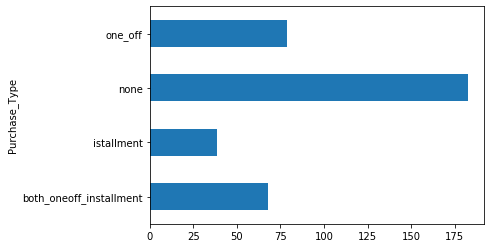

In [26]:
#Cash advance taken by customers based on type of purchase transaction

#We can observe here that customers who make neither type of transaction are more likely to take cash advance

train_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_cash_advance'])).plot.barh()

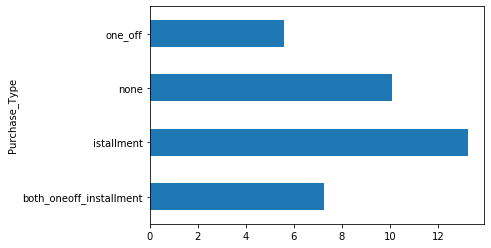

In [27]:
#Total payment to minimum payments ratio of a customer is indicated based on customers who do different purchases

#Here we can observe that Customers who are making installment purchases are making payments on time

train_data.groupby('Purchase_Type').apply(lambda x: np.mean(x['payment_minpay'])).plot.barh()

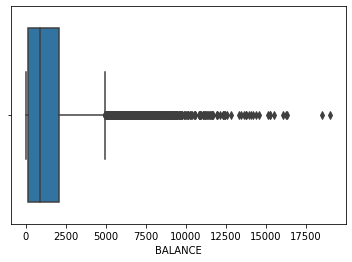

In [31]:
sns.boxplot(data=train_data,x=train_data['BALANCE'])

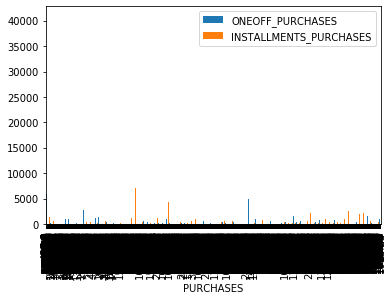

In [29]:
train_data.plot(x="PURCHASES", y=["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"],kind="bar")

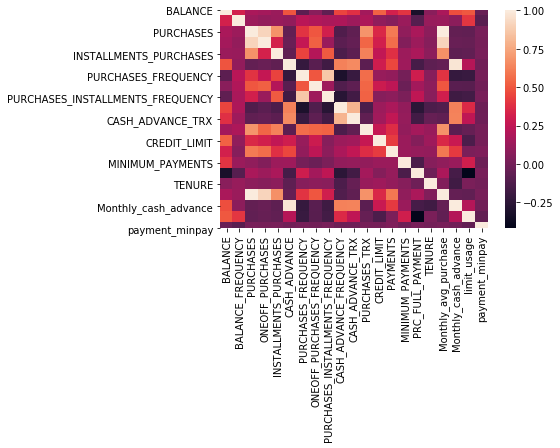

In [34]:
sns.heatmap(scaled_data.corr())

## Applying PCA

In [32]:
#We can observe from above correlation plot that the features are corelated. Hence, scaling the data and removing categorical variables by applying PCA

scaled_data = train_data.drop(['CUST_ID','Purchase_Type'],axis=1)

In [33]:
column_list = scaled_data.columns
print (column_list)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_avg_purchase', 'Monthly_cash_advance', 'limit_usage',
       'payment_minpay'],
      dtype='object')


In [35]:
from sklearn.preprocessing import  StandardScaler

In [36]:
#Standardizing data

scaled_data = StandardScaler().fit_transform(scaled_data)

In [37]:
print(scaled_data)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.46072665 -0.89295117
  -0.06441908]
 [ 0.78696085  0.13432467 -0.46955188 ...  2.31939618  0.17606298
  -0.04428153]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.46072665 -0.14420619
  -0.06826787]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.46072665 -0.93786286
  -0.06831531]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.42917652 -0.92883936
  -0.06868401]
 [-0.57257511 -0.88903307  0.04214581 ... -0.35109144 -0.20090741
  -0.07060546]]


In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA()
p = pca.fit(scaled_data)

In [42]:
pca_data = pca.transform(scaled_data)

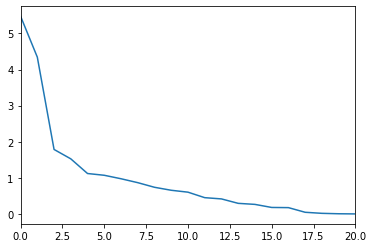

In [43]:
pd.Series(p.explained_variance_).plot()

In [44]:
#From the above plot, we can see that 5 components are defining the variance 
  
pca_new = PCA(n_components=5).fit(pca_data)

In [45]:
final_data=pca_new.fit_transform(pca_data)

In [46]:
final_data.shape

(8950, 5)

In [47]:
pd.DataFrame(pca_new.components_.T, columns=['PC_' +str(i) for i in range(5)],index=column_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE,1.000000e+00,3.949493e-13,-9.198806e-12,-5.811954e-12,-7.941375e-11
BALANCE_FREQUENCY,-3.989051e-13,1.000000e+00,-5.010328e-11,-2.741812e-11,-4.130206e-10
PURCHASES,9.887303e-12,5.338829e-11,1.000000e+00,2.303147e-08,2.205836e-07
ONEOFF_PURCHASES,6.360648e-12,2.975311e-11,-2.347700e-08,1.000000e+00,1.520190e-07
INSTALLMENTS_PURCHASES,9.145352e-11,4.715654e-10,-2.363834e-07,-1.597494e-07,9.999999e-01
CASH_ADVANCE,-1.022947e-10,-5.112855e-10,2.285768e-07,1.633903e-07,3.614344e-05
PURCHASES_FREQUENCY,-1.107227e-10,-5.569559e-10,2.328914e-07,1.482165e-07,1.414345e-05
ONEOFF_PURCHASES_FREQUENCY,-1.313543e-11,-2.698670e-11,-2.136187e-08,1.922448e-08,-1.066706e-06
PURCHASES_INSTALLMENTS_FREQUENCY,3.321899e-10,1.593678e-09,-5.151919e-07,-3.322583e-07,-1.516246e-05
CASH_ADVANCE_FREQUENCY,1.910431e-10,9.196887e-10,-2.877409e-07,-1.752826e-07,-7.538277e-06


In [49]:
# Factor Analysis : variance explained by each component- 
pd.Series(pca_new.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(5)])

PC_0    0.260797
PC_1    0.206844
PC_2    0.085051
PC_3    0.072651
PC_4    0.053301
dtype: float64

## Clustering using K-Means

In [50]:
from sklearn.cluster import KMeans

In [52]:
kmclusters_4=KMeans(n_clusters=4,random_state=123)
kmclusters_4.fit(final_data)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [53]:
kmclusters_4.labels_

array([2, 1, 0, ..., 0, 2, 2])

In [55]:
pd.Series(kmclusters_4.labels_).value_counts()

2    4229
0    3345
1    1114
3     262
dtype: int64

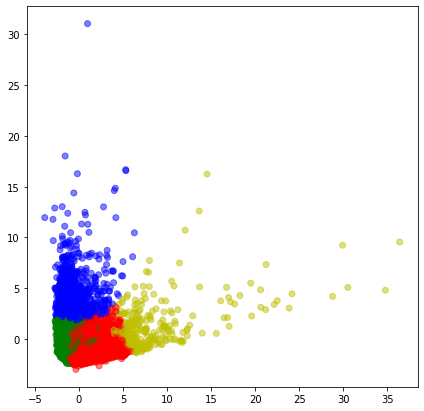

In [57]:
color_map={0:'r',1:'b',2:'g',3:'y'}
label_color=[color_map[l] for l in kmclusters_4.labels_]
plt.figure(figsize=(7,7))
plt.scatter(final_data[:,0],final_data[:,1],c=label_color,cmap='Spectral',alpha=0.5)

In [58]:
df_pair_plot=pd.DataFrame(final_data,columns=['PC_' +str(i) for i in range(5)])

In [59]:
df_pair_plot['Cluster']=kmclusters_4.labels_

C:\Users\PrasadaRao\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\PrasadaRao\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


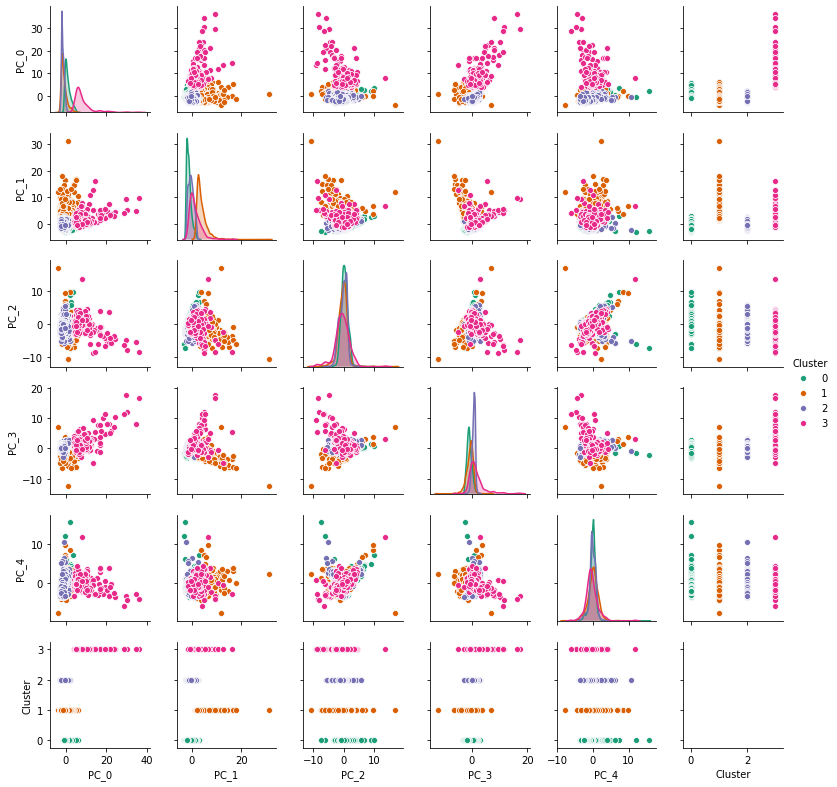

In [60]:
#pairwise relationship of components on the data
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',height=1.85)

In [63]:
# Key performace variable selection . here i am dropping varibales which are used in derving new KPI
kpi_cols = ['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','CREDIT_LIMIT']

In [65]:
cluster_df_4=pd.concat([final_data[kpi_cols],pd.Series(kmclusters_4.labels_,name='Cluster_4')],axis=1)


C:\Users\PrasadaRao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [66]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4


NameError: name 'cluster_df_4' is not defined

KeyError: 'Monthly_cash_advance'

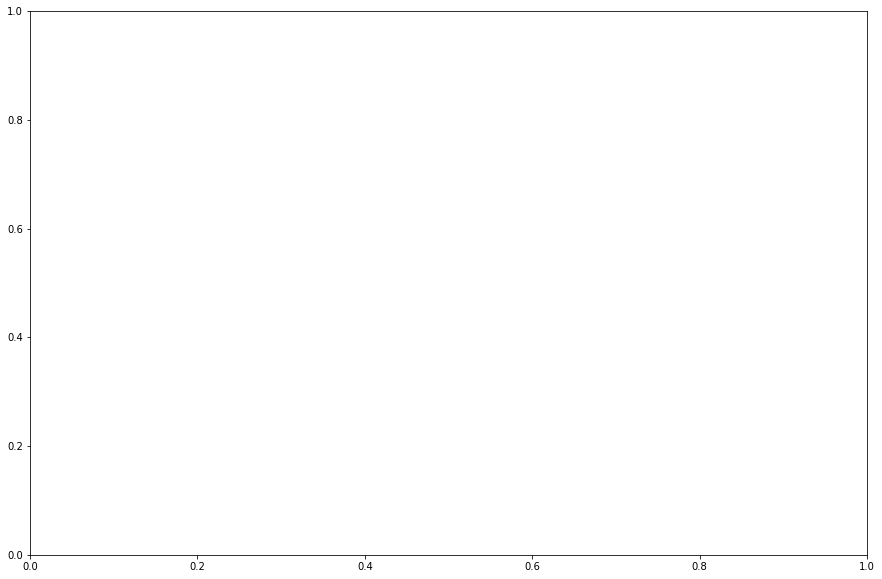

In [61]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(train_data.columns))

cash_advance=np.log(train_data.loc['Monthly_cash_advance',:].values)
limit_usage=(train_data.loc['limit_usage',:].values)
purchase= np.log(train_data.loc['Monthly_avg_purchase',:].values)
payment=train_data.loc['payment_minpay',:].values
installment=train_data.loc['INSTALLMENTS_PURCHASES',:].values
one_off=train_data.loc['ONEOFF_PURCHASES',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,limit_usage,color='m',label='Limit_usage',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()

In [74]:
#Checking performance metrics

from sklearn.metrics import calinski_harabasz_score,silhouette_score

In [76]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(final_data)
    score_c[n]=calinski_harabasz_score(final_data,km_score.labels_)
    score[n]=silhouette_score(final_data,km_score.labels_)

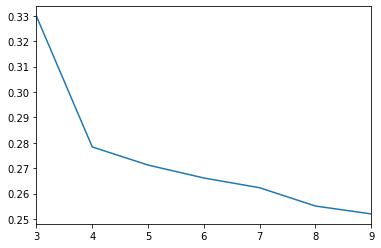

In [77]:
pd.Series(score).plot()

#We can observe that, performance metrics also indicate that 4 clusters are suitable

In [86]:
#Checking behavior with 5 clusters

km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(final_data)
km_5.labels_

array([4, 2, 1, ..., 4, 4, 0])

In [87]:
pd.Series(km_5.labels_).value_counts()

1    2953
0    2914
4    2029
2     810
3     244
dtype: int64

Text(0, 0.5, 'PC_1')

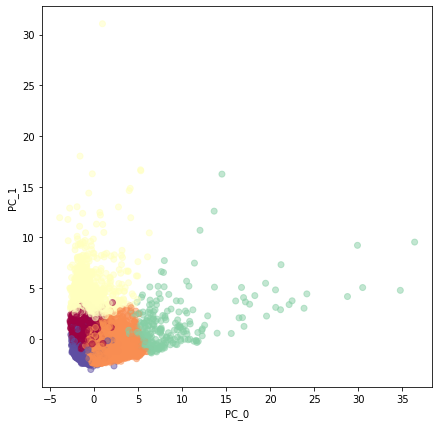

In [88]:
plt.figure(figsize=(7,7))
plt.scatter(final_data[:,0],final_data[:,1],c=km_5.labels_,cmap='Spectral',alpha=0.5)
plt.xlabel('PC_0')
plt.ylabel('PC_1')

In [89]:
#Checking behavior with 6 clusters

km_6=KMeans(n_clusters=6).fit(final_data)
km_6=km_6.fit(final_data)
km_6.labels_

array([0, 5, 1, ..., 1, 0, 3])

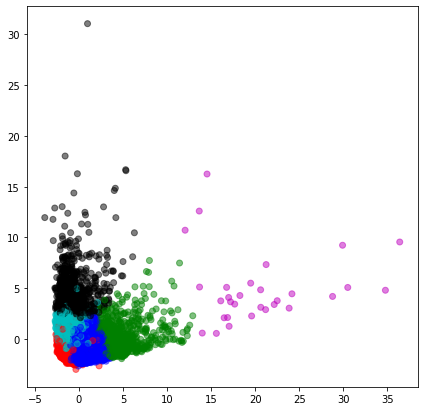

In [90]:
color_map={0:'r',1:'b',2:'g',3:'c',4:'m',5:'k'}
label_color=[color_map[l] for l in km_6.labels_]
plt.figure(figsize=(7,7))
plt.scatter(final_data[:,0],final_data[:,1],c=label_color,cmap='Spectral',alpha=0.5)
